In [2]:
import numpy as np
from matplotlib import pyplot as plt
# import qcodes as qc
# from qcodes.instrument_drivers.tektronix.Keithley_2600 import Keithley_2600 
# from qcodes.instrument_drivers.stanford_research.SR865 import SR865
# from qcodes.instrument_drivers.Keysight.Keysight_34465A import Keysight_34465A
# from qcodes.instrument_drivers.yokogawa.GS200 import GS200
import os
import sys
import time
import pandas
#from pysweep import Measurement, sweep, measurement
#from collections import OrderedDict
#from scipy.optimize import leastsq

#paths = [r"C:\Users\jowat\AppData\Local\Continuum\Anaconda3\envs\qcodes\Lib\site-packages\pysweep"
    
#]

# for p in paths:
#     if p not in sys.path:
#         sys.path.append(p)

In [5]:
#File info
DIR = r"C:\Users\jowat\data\2018-03-23"
device = 'MOSCAP003'

files = os.listdir(DIR)

files = [os.path.join(DIR, f) for f in files if f[-4:] == '.txt' and f[:9] == device]

summarypath = os.path.join(DIR, device + 'breakdown_voltages.txt')
summaryfile = open(summarypath,'w')
summaryfile.write('Diameter (um) \t Column number \t Broke down? \t Breakdown field (MV/cm) \n')

#print(files)

71

C:\Users\jowat\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


100um #3: Breakdown at 4.6 MV/cm
100um #4: Breakdown at > 4.9 MV/cm
100um #5: Breakdown at > 4.9 MV/cm
150um #3: Breakdown at > 4.9 MV/cm
150um #4: Breakdown at 4.7 MV/cm
150um #5: Breakdown at 4.6 MV/cm
200um #3: Breakdown at 3.8 MV/cm
300um #3: Breakdown at 3.3 MV/cm
50um #3: Breakdown at > 4.9 MV/cm
50um #4: Breakdown at > 4.9 MV/cm
50um #5: Breakdown at > 4.9 MV/cm
750um #3: Breakdown at 3.3 MV/cm


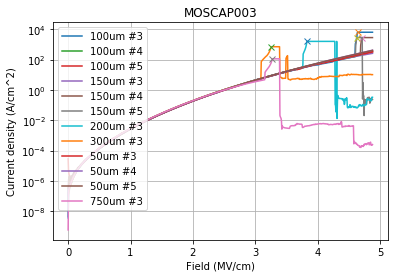

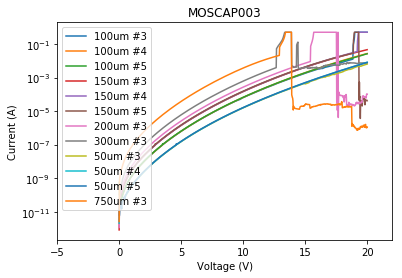

In [6]:
eps = 1e-3 #epsilon from zero for determining if sweep is positive or negative
threshold = 5 #threshold for detecting breakdown jump


#Pull out the capacitor pad diameters from filenames
diameters = np.empty(len(files), dtype=int)
for i in range(len(diameters)):
    if files[i].split('um')[0][-3:][0] == '_':
        diameters[i] = files[i].split('um')[0][-2:]
    else:
        diameters[i] = files[i].split('um')[0][-3:]
#diameters = files[0].split('um')[0][-3:]
#print(diameters)

#Pull out the capacitor column number measured (i.e. #1, #2, etc.)
columns = np.empty(len(files), dtype=int)
for i in range(len(columns)):
    columns[i] = files[i].split('um')[1][1:2]
#print(columns)

#Plot the data and find breakdown field
for i in range(len(files)):
    data = np.genfromtxt(files[i], delimiter='\t', skip_header=1)
    legendtext = str(diameters[i]) + 'um #' + str(columns[i])
    if data[0][0] < eps: #Use only up-sweeps
        pdiff = np.empty(np.shape(data)[0] - 1)
        brokedown = False
        for j in range(len(pdiff)):
            pdiff[j] = np.log10(abs(data[j+1,1] - data[j,1]))/np.log10(data[j+1,1])
            if not brokedown and pdiff[j] > threshold:
                brokedown = True
                x_breakdown = data[j,2]
                y_breakdown = data[j,3]
                #summaryfile.write(str(diameters[i]) + '\t' + str(columns[i]) + '\t' + str(x_breakdown/1e6) +'\n')
        
        plt.semilogy(data[:,2]/1e6, data[:,3], label=legendtext)
        if brokedown:
            plt.semilogy(x_breakdown/1e6, y_breakdown, 'x')
        #if brokedown:
            print(legendtext + ': Breakdown at ' + '{0:.1f}'.format(x_breakdown/1e6) + ' MV/cm')
            summaryfile.write(str(diameters[i]) + '\t' + str(columns[i]) + '\t 1 \t' + str(x_breakdown/1e6) +'\n')
        if not brokedown:
            print(legendtext + ': Breakdown at > ' + '{0:.1f}'.format(data[len(data)-1,2]/1e6) + ' MV/cm')
            summaryfile.write(str(diameters[i]) + '\t' + str(columns[i]) + '\t 0 \t' + '{0:.1f}'.format(data[len(data)-1,2]/1e6) +'\n')

plt.xlabel('Field (MV/cm)')
plt.ylabel('Current density (A/cm^2)')
plt.grid()
plt.legend(loc='upper left')
plt.title(device)
#plt.xlim([-2.5,5])
plt.show()

for i in range(len(files)):
    data = np.genfromtxt(files[i], delimiter='\t', skip_header=1)
    legendtext = str(diameters[i]) + 'um #' + str(columns[i])
    if data[0][0] < eps:
        plt.semilogy(data[:,0], data[:,1], label=legendtext)

plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.legend(loc='upper left')
plt.title(device)
plt.xlim([-5,22])
plt.show()

summaryfile.close()

## Check some individual line scans of the previous plots to see how breakdown field extraction is working

In [ ]:
data = np.genfromtxt(files[13], delimiter='\t', skip_header=1)
threshold = 5

pdiff = np.empty(np.shape(data)[0] - 1)
brokedown = False
for i in range(len(pdiff)):
    pdiff[i] = np.log10(abs(data[i+1,1] - data[i,1]))/np.log10(data[i+1,1])
    if not brokedown and pdiff[i] > threshold:
        brokedown = True
        x_breakdown = data[i,0]
        y_breakdown = data[i,1]

plt.plot(data[1:,0], pdiff)
plt.plot(x_breakdown, threshold, 'x')
plt.show()

plt.semilogy(data[:,0], data[:,1], label=legendtext)
if brokedown:
    plt.semilogy(x_breakdown, y_breakdown, 'x')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.legend()
plt.title(device)
plt.show()

if brokedown:
    print('Breakdown at ' + str(x_breakdown) + 'V')
if not brokedown:
    print('Breakdown at > ' + str(data[len(data)-1,0]))

## Compare breakdown voltages vs diameter

In [4]:
summarydata = np.genfromtxt(summarypath, delimiter='\t', skip_header=1)

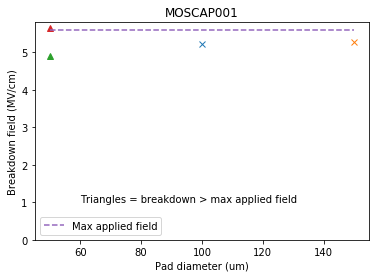

In [7]:
j = 0
for i in range(np.shape(summarydata)[0]):
    if int(summarydata[i,2]) == 1:
        plt.plot(summarydata[i,0], summarydata[i,3], 'x')
    else:
        plt.plot(summarydata[i,0], summarydata[i,3]*(1 + j*0.01), '^')
        j = j + 1

        
plt.plot(np.linspace(min(summarydata[:,0]), max(summarydata[:,0]), np.shape(summarydata)[0]), np.ones(np.shape(summarydata)[0])*max(summarydata[:,3]), '--', label = 'Max applied field')
plt.xlabel('Pad diameter (um)')
plt.ylabel('Breakdown field (MV/cm)')
plt.title(device)
plt.legend()
plt.ylim([0, 5.8])
plt.annotate('Triangles = breakdown > max applied field', [60,1])
plt.show()